# Selecting the Best Cluster Model

## The following code was used in assessing the best cluster/mixture models as determined by ClusterModels.ipynb. Aside from having the best silhouette score, I needed to assess different solutions, with different k-values in order to choose a solution which yielded segments that made the most sense as groups of people that exist in the real world. 

### The Process
- From ClusterModels.ipynb, selected the models yielding the highest silhouette scores to analzye using the database from BuildDatabase.ipynb
    - KMeans 3 Segment Solution
        - A good solution
    - KMeans 4 Segment Solution
        - A good solution, however 2 of the segments are not distinct enough from each other, and sil-score decreases
    - KMeans 8 Segment Solution
        - Too many segments that are not distinct enough
    - Hierarchical 3 Segment Solution
        - Segment sizes too small
    - Hierarchical 4 Segment Solution
        - Segment sizes too small
    - Gaussian Mixture Model 3 Segment Solution
        - A good solution
    - Gaussian Mixture Model 4 Segment Solution
        - A good solution, however 2 of the segments are not distinct enought and sil-score decreases


### The Results
- Selected Gaussian Mixture Model 3 Segment Solution as the best segmentation solution. KMeans 3 Segment Solution was also considered, but Gaussian Mixture Model had a slightly higher sil-score which will help when building a classification model later.


## Work Shown Below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from pipeline import *
from plot_segementation_scores import *
%autoreload

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
path = '../data/2017 Pew Research Center Science and News Survey/Segmentation_data.csv'

In [3]:
## Variables to profile/analyze when selecting the best segmentation solution
NEWS_ATTITUDES_BEHAVIORS = ['Very interested in local community news', 
                            'Very interested in sports news', 
                            'Very interested in business and finance news', 
                            'Very interested in science news',
                            'Very interested in entertainment news',
                            'Enjoy science news a lot more than other news', 
                            'I know a lot about science',
                            'Enjoy talking with others about what\'s happening in science is a major reason to follow science news',
                            'It is related to things I need to know for my job is a major reason to follow science news',
                            'Helps me make decision about every day life is a major reason to follow science news',
                            'I feel I have a social or civil obligation to stay informed is a major reason to follow science news',
                            'I am curious about what\'s happening in science is a major reason to follow science news',
                            'It is related to my activities, hobbies or interests is a major reason to follow science news',
                            'Science news is boring is a major reason to not follow science news',
                            'Science news is hard to understand is a major reason to not follow science news',
                            "I often disagree with science news is a major reason to not follow science news",
                            "Science news is less important than other topics is a major reason to not follow science news",
                            "I am too busy to keep up with science news more often is a major reason to not follow science news",
                            "I already get enough science news is a major reason to not follow science news",
                            "The sources I regulary get news from don't cover a lot of science is a major reason to not follow science news",
                            "The science topics I'm most interested in are not covered often is a major reason to not follow science news",
                            'I read, watch or listen to science news nearly every day',
                            'I read, watch or listen to science news a few times a week',
                            'I read, watch or listen to science news a few times a month',
                            'I read, watch or listen to science news less often than a few times a month',   
                            'Most interested in health & medicine', 
                            'Most interested in technology', 
                            'Most interested in energy and environment',
                            'Most interested in food and nutrition',
                            'Most interested in space and astronomy', 
                            'Most interested in evolution of human & animals',
                            'Most interested in the mind and brain',
                            'News media does a very good job in covering science',
                            'Follow science organizations, people or pages on social media',
                            'I have science-related hobbies, interests or activities outside of work']

HOBBIES_NONSCIENCE_BEHAVIORS = ['Visited zoo',
                                'Visited art museum',
                                'Visited natural history museum',
                                'Visited science/tech center/museum',
                                'Visited national, state or country park',
                                'Visited public library',
                                'Attended event with live music',
                                'Attended sport event',
                                'Attended science lecture/talk',
                                'Use social media']


DEMOGRAPHICS = ['Industry: Health Care & Social Assistance',
                'Industry: Educational Services',
                'Industry: Professional, Scientific & Technical services',
                'Industry: Retail Trade',
                'Industry: Manufacturing',
                'Industry: Other Services & Community/Non-Profit Organizations',
                'Industry: Finance and Insurance',
                'Industry: Construction',
                'Industry: Accommodation & Food Services',
                'Industry: Transportation & Warehousing',
                'Industry: Information',
                "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65-74", "75+", 
                'Male', 'Female']

In [4]:
segment_vars = ['ENJOY', 'KNOWLEDGE', 'SCIOFTEN', 'TOPICS1']
data, segment_data = get_cluster_data(path, segment_vars)

In [5]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10]

## KMeans

[0.45112717371537525, 0.3970577263029513, 0.38311196661911023, 0.4062265854009041, 0.3626678841928503, 0.3869500356805017, 0.4191908474177662, 0.43541258389506254]


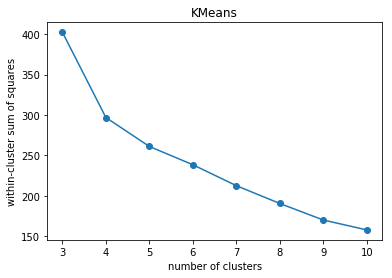

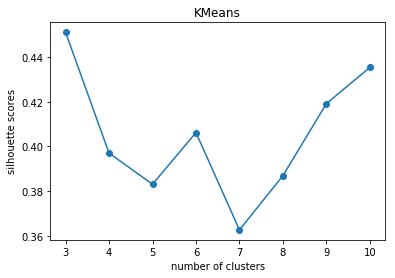

In [6]:
plot_scores_kmeans(segment_data, k_vals)

### 3 Segment Solution

In [7]:
km3 = KMeans(n_clusters = 3)
km3.fit(segment_data)
labelsk3 = km3.labels_
database_datak3 = data.copy()
database_datak3['Segment'] = labelsk3
dfk_3 = get_database(database_datak3)

#### Segment Sizes 

In [8]:
print('Size of Segment 0: {}'.format(len(labelsk3[labelsk3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk3[labelsk3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk3[labelsk3==2])/len(segment_data)))

Size of Segment 0: 0.22480902146234993
Size of Segment 1: 0.4554383412149873
Size of Segment 2: 0.3197526373226628


#### Looking at the Database

In [9]:
dfk_3.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
I am curious about what's happening in science is a major reason to follow science news,36.73,25.40,78.61
"I read, watch or listen to science news a few times a week",1.94,14.70,65.76
Very interested in science news,15.05,10.38,62.57
Very interested in local community news,44.98,38.02,53.47
"I have science-related hobbies, interests or activities outside of work",11.00,11.02,40.39
Very interested in business and finance news,18.12,14.38,32.08
"I read, watch or listen to science news nearly every day",0.00,3.91,31.85
Enjoy talking with others about what's happening in science is a major reason to follow science news,9.55,7.51,30.72
"Follow science organizations, people or pages on social media",13.59,13.10,30.26
"It is related to my activities, hobbies or interests is a major reason to follow science news",10.19,10.38,27.87


In [10]:
dfk_3.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
Use social media,68.93,70.45,68.71
"Visited national, state or country park",54.05,46.09,67.92
Attended event with live music,43.69,39.70,57.68
Visited public library,41.42,41.13,57.34
Attended sport event,37.86,38.10,42.43
Visited art museum,25.40,18.85,39.93
Visited zoo,29.94,29.55,35.84
Visited science/tech center/museum,15.70,14.30,33.33
Visited natural history museum,15.86,13.18,26.17
Attended science lecture/talk,6.47,5.67,22.98


In [11]:
dfk_3.loc[DEMOGRAPHICS]

Segment,0,1,2
Industry: Health Care & Social Assistance,5.18,9.11,8.53
Industry: Educational Services,6.80,7.27,9.44
"Industry: Professional, Scientific & Technical services",7.44,4.71,9.67
Industry: Retail Trade,6.80,6.47,5.46
Industry: Manufacturing,5.66,4.39,5.01
Industry: Other Services & Community/Non-Profit Organizations,4.37,4.47,2.62
Industry: Finance and Insurance,4.69,3.99,2.50
Industry: Construction,2.91,3.12,2.96
Industry: Accommodation & Food Services,2.75,3.12,2.50
Industry: Transportation & Warehousing,2.91,3.12,2.05


In [12]:
dfk_3.sort_values(2, ascending = False)

Segment,0,1,2
SEGMENT SIZE,618.00,1252.00,879.00
Get science news on a lot of different topics,100.00,0.00,100.00
Interested in science news,79.94,60.06,98.63
Interested in local community news,90.29,88.18,93.17
Science news is boring is not a reason to not follow science news,78.80,65.73,91.70
Interested in government and politics news,77.02,67.97,89.42
I watch/read/listen to news stories that report new scientific discoveries,67.64,49.44,88.51
Live in metro area,86.89,84.50,87.49
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",89.16,82.19,87.26
Interested in health & medicine,78.64,68.45,85.21


### 4 Segment Solution

In [13]:
km4 = KMeans(n_clusters = 4)
km4.fit(segment_data)
labelsk4 = km4.labels_
database_datak4 = data.copy()
database_datak4['Segment'] = labelsk4
dfk_4 = get_database(database_datak4)

#### Segment Sizes

In [14]:
print('Size of Segment 0: {}'.format(len(labelsk4[labelsk4==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk4[labelsk4==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk4[labelsk4==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsk4[labelsk4==3])/len(segment_data)))

Size of Segment 0: 0.3132048017460895
Size of Segment 1: 0.196071298654056
Size of Segment 2: 0.25936704256093124
Size of Segment 3: 0.23135685703892325


#### Looking at the Database

In [15]:
dfk_4.sort_values(3, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,861.00,539.00,713.00,636.00
Get science news on a lot of different topics,100.00,0.00,0.00,100.00
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,83.97,93.32,96.63,93.08
Interested in local community news,93.38,90.54,86.40,90.09
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",87.46,82.56,81.91,88.84
"I do not have science-related hobbies, interests or activities outside of work",59.47,80.33,95.51,88.36
Live in metro area,87.46,89.61,80.65,86.95
Get science news sources that cover all sorts of topics,66.90,72.73,78.96,83.81
Interested in science news,98.72,86.27,40.25,80.35
Science news is boring is not a reason to not follow science news,91.52,76.99,57.22,79.40


In [16]:
dfk_4.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(3, ascending = False)

Segment,0,1,2,3
"I read, watch or listen to science news a few times a month",0.35,54.73,13.60,75.00
Very interested in local community news,54.24,43.23,34.08,44.18
I am curious about what's happening in science is a major reason to follow science news,78.51,44.53,10.94,38.05
Most interested in health & medicine,28.11,28.57,33.66,28.14
"I read, watch or listen to science news less often than a few times a month",0.00,2.04,86.40,23.11
Most interested in technology,22.65,18.55,11.78,19.03
Very interested in business and finance news,32.52,20.04,10.10,17.92
Very interested in sports news,17.77,20.96,16.97,17.30
Very interested in science news,62.83,21.34,2.10,16.04
Helps me make decision about every day life is a major reason to follow science news,25.32,19.11,10.80,14.78


In [17]:
dfk_4.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(3, ascending = False)

Segment,0,1,2,3
Use social media,68.41,69.94,70.83,69.34
"Visited national, state or country park",68.18,55.10,39.27,54.09
Attended event with live music,58.30,43.23,37.03,43.24
Visited public library,57.49,50.46,34.08,41.67
Attended sport event,43.09,43.23,34.22,37.11
Visited zoo,35.77,32.65,27.21,30.19
Visited art museum,40.19,26.35,13.18,25.47
Visited science/tech center/museum,33.45,20.96,9.26,16.04
Visited natural history museum,26.60,18.92,8.84,15.57
Attended science lecture/talk,23.23,10.95,1.68,6.60


In [18]:
dfk_4.loc[DEMOGRAPHICS].sort_values(3, ascending = False)

Segment,0,1,2,3
Female,36.00,49.54,61.85,50.63
Male,64.00,50.46,38.15,49.37
55-64 years old,24.62,20.78,23.70,21.86
25-34 years old,14.29,19.48,13.60,18.08
65-74,17.77,14.29,15.15,17.45
45-54 years old,16.84,16.88,18.51,16.82
35-44 years old,16.14,18.55,16.97,14.15
"Industry: Professional, Scientific & Technical services",9.64,5.38,4.21,7.55
Industry: Retail Trade,4.99,5.75,7.01,7.39
Industry: Educational Services,9.41,8.35,6.45,6.92


### 8 Segment Solution

In [19]:
km8 = KMeans(n_clusters = 8)
km8.fit(segment_data)
labelsk8 = km8.labels_
database_datak8 = data.copy()
database_datak8['Segment'] = labelsk8
dfk_8 = get_database(database_datak8)

#### Segment Sizes 

In [20]:
print('Size of Segment 0: {}'.format(len(labelsk8[labelsk8==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk8[labelsk8==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk8[labelsk8==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsk8[labelsk8==3])/len(segment_data)))
print('Size of Segment 4: {}'.format(len(labelsk8[labelsk8==4])/len(segment_data)))
print('Size of Segment 5: {}'.format(len(labelsk8[labelsk8==5])/len(segment_data)))
print('Size of Segment 6: {}'.format(len(labelsk8[labelsk8==6])/len(segment_data)))
print('Size of Segment 7: {}'.format(len(labelsk8[labelsk8==7])/len(segment_data)))

Size of Segment 0: 0.2513641324117861
Size of Segment 1: 0.1447799199708985
Size of Segment 2: 0.11094943615860313
Size of Segment 3: 0.14259730811204074
Size of Segment 4: 0.07639141506002183
Size of Segment 5: 0.09166969807202618
Size of Segment 6: 0.11713350309203346
Size of Segment 7: 0.06511458712259004


#### Looking at the database 

In [21]:
dfk_8.sort_values(0, ascending = False)

Segment,0,1,2,3,4,5,6,7
SEGMENT SIZE,691.00,398.00,305.00,392.00,210.00,252.00,322.00,179.00
Get science news on a lot of different topics,100.00,0.00,100.00,0.00,0.00,0.00,100.00,100.00
Interested in science news,98.55,79.15,67.87,27.30,92.38,53.97,91.93,98.88
Interested in local community news,93.92,91.46,90.49,83.67,91.90,86.90,89.44,91.62
Interested in government and politics news,90.59,72.86,82.95,56.63,84.76,63.89,71.43,85.47
Science news is boring is not a reason to not follow science news,90.45,72.86,70.82,47.70,81.43,69.44,87.89,94.41
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",87.99,83.67,88.85,81.63,82.86,80.16,89.13,84.92
Live in metro area,87.70,87.19,85.25,80.36,91.90,80.56,87.89,87.71
I watch/read/listen to news stories that report new scientific discoveries,87.12,57.04,60.98,27.04,77.14,49.21,75.78,91.62
Interested in health & medicine,85.96,75.63,75.41,54.85,72.86,74.60,81.37,83.24


## Hierarchical

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193, 0.23372930810524115, 0.29110313984745895]


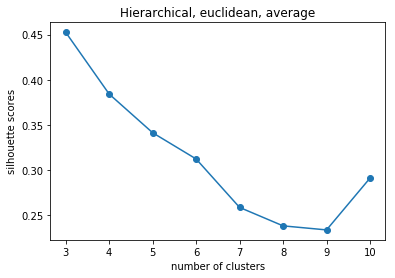

In [22]:
plot_sil_scores_hclust(segment_data, k_vals, 'euclidean', 'average')

In [23]:
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
hc3.fit(segment_data)
labelsh3 = hc3.labels_
database_datah3 = data.copy()
database_datah3['Segment'] = labelsh3
dfh_3 = get_database(database_datah3)

#### Segment Sizes

In [24]:
print('Size of Segment 0: {}'.format(len(labelsh3[labelsh3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsh3[labelsh3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsh3[labelsh3==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsh3[labelsh3==3])/len(segment_data)))

Size of Segment 0: 0.42779192433612223
Size of Segment 1: 0.532557293561295
Size of Segment 2: 0.012004365223717716
Size of Segment 3: 0.027646416878865043


In [25]:
dfh_3.sort_values(1, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,1176.00,1464.00,33.00,76.00
Get science news on a lot of different topics,0.00,100.00,100.00,0.00
Interested in science news,57.74,92.35,27.27,96.05
Interested in local community news,88.27,92.35,75.76,86.84
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",82.14,88.39,72.73,82.89
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,95.66,87.57,100.00,88.16
Live in metro area,84.01,87.09,93.94,92.11
Science news is boring is not a reason to not follow science news,64.88,86.82,66.67,78.95
Interested in government and politics news,66.84,84.97,54.55,85.53
Interested in health & medicine,68.28,83.40,42.42,71.05


## Gaussian Mixture Model

[0.44160242516405834, 0.3928321171527318, 0.34785597302559856, 0.3245994707057179, 0.31940990633132904, 0.2989475035146235, 0.35211987414933305, 0.37174515483312937]


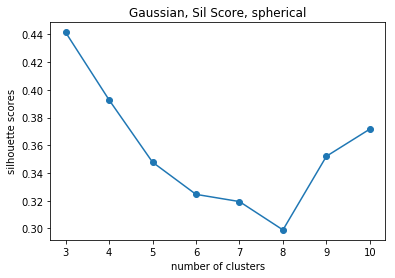

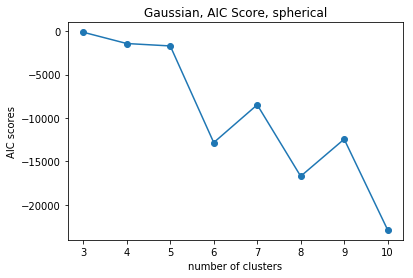

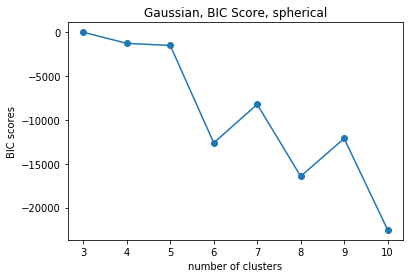

In [26]:
plot_scores_gauss(segment_data, k_vals, 'spherical', max_iter = 100)

### 3 Segment Solution

In [27]:
gm3 = GaussianMixture(n_components = 3, covariance_type=  'spherical')
gm3.fit(segment_data)
labelsg3 = gm3.predict(segment_data)
database_datag3 = data.copy()
database_datag3['Segment'] = labelsg3
dfg_3 = get_database(database_datag3)

#### Segment Sizes

In [28]:
print('Size of Segment 0: {}'.format(len(labelsg3[labelsg3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsg3[labelsg3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsg3[labelsg3==2])/len(segment_data)))

Size of Segment 0: 0.5445616587850127
Size of Segment 1: 0.29574390687522734
Size of Segment 2: 0.1596944343397599


#### Looking at the Database

In [29]:
dfg_3.sort_values(0, ascending = False)

Segment,0,1,2
SEGMENT SIZE,1497.00,813.00,439.00
Get science news on a lot of different topics,100.00,0.00,0.00
Interested in local community news,91.98,87.33,89.75
Interested in science news,90.92,45.02,87.93
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",88.04,82.04,82.46
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,87.84,95.69,94.31
Live in metro area,87.24,81.80,89.52
Science news is boring is not a reason to not follow science news,86.37,58.30,79.50
Interested in government and politics news,84.30,63.35,76.54
Interested in health & medicine,82.50,65.93,73.12


In [30]:
dfg_3.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
I am curious about what's happening in science is a major reason to follow science news,61.32,12.55,49.20
"I read, watch or listen to science news a few times a month",32.06,24.85,43.28
Very interested in local community news,49.97,35.92,41.91
"I read, watch or listen to science news a few times a week",39.41,0.12,41.69
Most interested in health & medicine,28.12,33.58,27.56
Very interested in science news,42.95,2.21,25.51
"I have science-related hobbies, interests or activities outside of work",28.26,4.43,23.23
"Follow science organizations, people or pages on social media",23.38,7.87,22.78
Most interested in food and nutrition,10.35,23.00,20.27
Very interested in business and finance news,26.32,11.19,20.27


In [31]:
dfg_3.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
Use social media,68.80,71.22,69.02
"Visited national, state or country park",62.19,39.98,57.40
Visited public library,50.77,35.06,52.39
Attended event with live music,51.90,37.52,43.74
Attended sport event,40.55,35.55,42.82
Visited zoo,33.40,27.55,33.26
Visited art museum,33.93,14.64,26.65
Visited science/tech center/museum,26.05,9.59,23.01
Visited natural history museum,21.91,10.09,18.91
Attended science lecture/talk,16.17,1.97,12.53


In [32]:
dfg_3.loc[DEMOGRAPHICS].sort_values(2, ascending = False)

Segment,0,1,2
Male,57.78,39.73,50.34
Female,42.22,60.27,49.66
55-64 years old,23.45,23.49,20.50
25-34 years old,15.90,14.27,19.59
35-44 years old,15.30,16.73,19.36
45-54 years old,16.83,18.33,16.86
65-74,17.64,15.74,12.98
Industry: Health Care & Social Assistance,7.15,7.87,11.39
Industry: Educational Services,8.35,6.52,8.66
Industry: Retail Trade,6.01,6.89,5.69


### 4 Segment Solution

In [33]:
gm4 = GaussianMixture(n_components = 4, covariance_type=  'spherical')
gm4.fit(segment_data)
labelsg4 = gm4.predict(segment_data)
database_datag4 = data.copy()
database_datag4['Segment'] = labelsg4
dfg_4 = get_database(database_datag4)

#### Segment Sizes

In [34]:
print('Size of Segment 0: {}'.format(len(labelsg4[labelsg4==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsg4[labelsg4==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsg4[labelsg4==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsg4[labelsg4==3])/len(segment_data)))

Size of Segment 0: 0.3132048017460895
Size of Segment 1: 0.20662058930520188
Size of Segment 2: 0.2488177519097854
Size of Segment 3: 0.23135685703892325


#### Looking at the Database

In [35]:
dfg_4.sort_values(0, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,861.00,568.00,684.00,636.00
Get science news on a lot of different topics,100.00,0.00,0.00,100.00
Interested in science news,98.72,35.39,80.56,80.35
Interested in local community news,93.38,87.32,88.89,90.09
Science news is boring is not a reason to not follow science news,91.52,53.70,75.73,79.40
Interested in government and politics news,89.55,62.85,72.22,77.20
I watch/read/listen to news stories that report new scientific discoveries,88.50,32.39,63.60,68.24
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",87.46,82.39,82.02,88.84
Live in metro area,87.46,80.11,88.16,86.95
Interested in health & medicine,85.71,62.50,73.39,78.14
